In [21]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()

In [22]:
dir(iris)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [23]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [24]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [25]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [26]:
df['target']=iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [27]:
df[iris.target==2].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2


In [28]:
df['flower_name']=df.target.apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [29]:
df[45:58]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
45,4.8,3.0,1.4,0.3,0,setosa
46,5.1,3.8,1.6,0.2,0,setosa
47,4.6,3.2,1.4,0.2,0,setosa
48,5.3,3.7,1.5,0.2,0,setosa
49,5.0,3.3,1.4,0.2,0,setosa
50,7.0,3.2,4.7,1.4,1,versicolor
51,6.4,3.2,4.5,1.5,1,versicolor
52,6.9,3.1,4.9,1.5,1,versicolor
53,5.5,2.3,4.0,1.3,1,versicolor
54,6.5,2.8,4.6,1.5,1,versicolor


In [30]:
df0=df[:50]
df1 = df[50:100]
df2 = df[100:]

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline


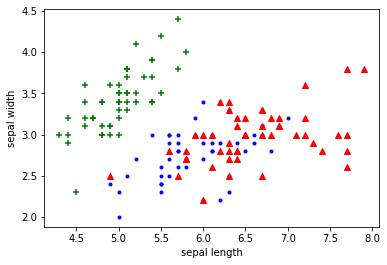

In [32]:
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'],color ="green",marker='+')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'],color ="blue",marker='.')
plt.scatter(df2['sepal length (cm)'], df2['sepal width (cm)'],color ="red",marker='^')



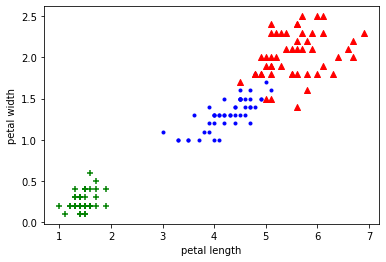

In [33]:
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'],color ="green",marker='+')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'],color ="blue",marker='.')
plt.scatter(df2['petal length (cm)'], df2['petal width (cm)'],color ="red",marker='^')


In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X=df.drop(['target','flower_name'],axis='columns')
y = df.target

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [37]:
len(X_train)

120

In [38]:
from sklearn.svm import SVC
model = SVC()

In [39]:
from sklearn.neighbors import KNeighborsClassifier as knn
m2=knn(n_neighbors=3)

In [40]:
m2.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [41]:
m2.score(X_test,y_test)

0.9666666666666667

In [158]:
model.fit(X_train,y_train)

SVC()

In [159]:
model.score(X_test,y_test)

1.0

In [163]:
model.predict([[6.3,3.3,4.7,1.6]])

array([1])

In [169]:
model_C=SVC(C=30)
model_C.fit(X_train,y_train)
model_C.score(X_test,y_test)

1.0

model_g=SVC(gamma=30)
model_g.fit(X_train,y_train)
model_g.score(X_test,y_test)

In [171]:
model_g=SVC(gamma=10) 
model_g.fit(X_train,y_train) 
model_g.score(X_test,y_test)

0.9333333333333333

In [42]:
from sklearn.metrics import confusion_matrix as cs

In [44]:
y_pred=m2.predict(X_test)

In [48]:
cm=cs(y_test,y_pred)

In [49]:
%matplotlib inline

Text(42.0, 0.5, 'Truth')

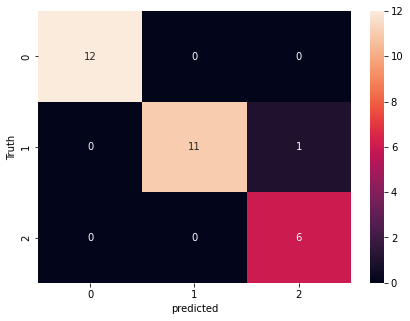

In [50]:
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm,annot=True)
plt.xlabel('predicted')
plt.ylabel('Truth')

In [52]:
from sklearn.metrics import classification_report as cr

In [53]:
print(cr(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.92      0.96        12
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

